In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import problem_description
%run problem_description.py

In [2]:
# Conditions for Sample based on input uncertainty - Currently set to Sample 10 
duration = 1.9732759967     # Amount of time it takes to reach Max power [seconds] 
power = 0.999986638         # Appliew power [Watts]
poweron = 10.0              # Applied power on for 10 [seconds] - DON'T CHANGE
volume12 = 13.1533          # Volume of 12 coils - DON'T CHANGE

In [3]:
# creating data for ANSYS input power profile
x = np.linspace(0.0,duration,100)    # time (0, 0.99,100) 
y = (1/duration)*x                   # power profile for time to max (linear) 
y3 = ((-1)*(1/duration)*(x**(1)))+1  # power profile after power is turned off (linear)

In [4]:
# Ranges necessary for ANSYS power applied parameter
x_a1= np.array([duration+0.01,poweron-0.001]) #[1.01,9.999])
x_a2= np.array([poweron+0.001,15])
x_a3= np.linspace(poweron+0.001,poweron+duration,100) #(10.0,10.2,100) #(10.0,11.0,100)
x_a4= np.array([poweron+duration+0.01,15]) #[10.201,15]) # [11.001,15])
x_a5= np.linspace(poweron,15.0,100)
y_a1= np.array([1,1])
y_a2= np.array([0,0])
y_a4= np.array([0,0])

In [5]:
x_on  = np.concatenate((x,x_a1,x_a2))
x_off = np.concatenate((x,x_a1,x_a3,x_a4))
x_off_1 = np.concatenate((x,x_a1,x_a5))
y_on  = np.concatenate((y,y_a1,y_a2))
y_on_Wm =y_on*(power/volume12)*(1e9)        # divide by coil volume in mm and convert to meters
y_off = np.concatenate((y,y_a1,y3,y_a4))    # Assumes y has been established first!
y_off_Wm =y_off*(power/volume12)*(1e9)      # divide by coil volume in mm and convert to meters
y_off_1 = np.concatenate((y,y_a1,y3))       # Assumes y has been established first!
y_off_1_Wm =y_off_1*(power/volume12)*(1e9)  # divide by coil volume in mm and convert to meters
data = {'t[s]': x_off, 'Power[W m^-3]':y_off_Wm} #'Power[W]':y_on, 
data_ansys_power = pd.DataFrame(data,columns=['t[s]','Power[W m^-3]']) #'Power[W]',
data_ansys_power.to_csv('data/data_power/sampleNEW.csv', index=False) 
data_ansys_power.head()

,t[s],Power[W m^-3]
0,0.000000,0.000000e+00
1,0.019932,7.679347e+05
2,0.039864,1.535869e+06
3,0.059796,2.303804e+06
4,0.079728,3.071739e+06


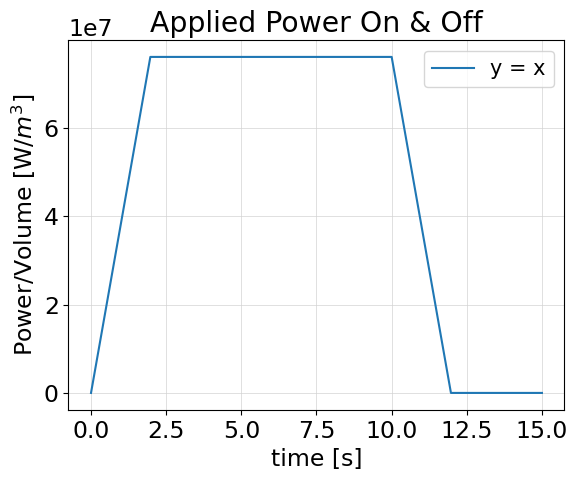

In [7]:
plt.title('Applied Power On & Off')
plt.xlabel('time [s]')
plt.ylabel('Power/Volume [W/$m^3$]')
plt.plot(x_off,y_off_Wm,label='y = x');
plt.legend(prop={'size':15})
plt.grid(color='lightgray', linestyle='-', linewidth=0.5) 
plt.savefig('figures/powerProfile.png', dpi=300) 